In [3]:
# Librerias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error
from pandas.api.types import is_numeric_dtype
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/GRUPO15-BASE5/ENTREGA FINAL GRUPO 15/Base 5 Incumplimiento de préstamo.csv")

In [5]:
df.head()

,Unnamed: 0,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,1,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,2,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,3,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,4,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

In [7]:
# Eliminamos columnas innecesarias
cols_to_drop = ['Unnamed: 0', 'year']
df = df.drop(columns=cols_to_drop)



In [8]:
## Separamos para posteriormente hacer el dummy

categorical=[
    "Gender","approv_in_adv","loan_type","loan_purpose","loan_purpose"
    ,"Credit_Worthiness","open_credit","business_or_commercial","Neg_ammortization"
    ,"interest_only","lump_sum_payment","construction_type","occupancy_type","Secured_by"
    ,"total_units","credit_type","co-applicant_credit_type","age","submission_of_application"
    ,"Region","Security_Type","loan_limit"
]
numeric =[
    "loan_amount","term","income","Credit_Score","Upfront_charges","LTV","property_value"
    ,"dtir1","Status"
]

In [9]:
 # Impugnamos valores nulos en las variables categóricas, reemplazándolos
    # por la moda
for col in categorical:
    df[col] = df[col].fillna(df[col].mode().values[0])
    # Impugnamos valores nulos en las variables numéricas, reemplazándolos
    # por la mediana
for col in numeric:
    df[col] = df[col].fillna(df[col].median())


    # Verificamos que no existan valores nulos en el dataset final
assert df.isna().any().any() == False

    # Verificamos que todas las columnas numéricas son variables numéricas
assert np.all(is_numeric_dtype(df[col]) for col in df.columns)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   Upfront_charges            148670 non-null  float64
 10  term                       148670 non-null  float64
 11  Neg_ammortization          148670 non-null  object 
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

In [11]:
encoded_categorias=pd.get_dummies(df[categorical])
df=pd.concat([encoded_categorias,df[numeric]], axis=1)

In [12]:
df.head()

,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,...,loan_limit_ncf,loan_amount,term,income,Credit_Score,Upfront_charges,LTV,property_value,dtir1,Status
0,0,0,0,1,1,0,1,0,0,1,...,0,116500,360.0,1740.0,758,2596.45,98.728814,118000.0,45.0,1
1,0,0,1,0,1,0,0,1,0,1,...,0,206500,360.0,4980.0,552,2596.45,75.135870,418000.0,39.0,1
2,0,0,1,0,0,1,1,0,0,1,...,0,406500,360.0,9480.0,834,595.00,80.019685,508000.0,46.0,0
3,0,0,1,0,1,0,1,0,0,0,...,0,456500,360.0,11880.0,587,2596.45,69.376900,658000.0,42.0,0
4,0,1,0,0,0,1,1,0,0,1,...,0,696500,360.0,10440.0,602,0.00,91.886544,758000.0,39.0,0


In [13]:
X=df.drop(["Status"],axis = 1) #variables clasificadoras (features)
y=df.Status # grupo (target)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)
pd.value_counts(df['Status'])

0    112031
1     36639
Name: Status, dtype: int64

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, precision_score, recall_score  # métricas para evaluar
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
!pip install lightgbm
from lightgbm import LGBMClassifier


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C = np.logspace(-2, 10, 13)
pipe_LGBM = Pipeline([('sc', StandardScaler()),
    ('LGBM', LGBMClassifier())
    ])
# definimos los vactores de parámetros para hacer las estimaciones
params_lr= {
    'LGBM__n_estimators': [5, 7, 10, 12, 15],
    'LGBM__max_depth': [5, 7, 10, 12, 15, 20],
    'LGBM__learning_rate': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
    'LGBM__random_state': [11]
    }
# proponemos la busqueda del mejor modelo según el resultado de la mejor clasificación (accuracy) con la tasa crosvalidada (GridSearchCV)
search_lr = GridSearchCV(estimator=pipe_LGBM,
                      param_grid=params_lr,
                      cv = 5,
                      scoring="roc_auc",
                      return_train_score=True)

search_lr.fit(X_train, y_train)
print(f" Best score is: {search_lr.best_score_} with parameters: {search_lr.best_params_}")

In [17]:
##hiperparametros optimizados pero no se usan ya que la mejora no es significativa
#params = {
#    'learning_rate': 0.25,
#    'max_depth': 20,
#    'n_estimators': 15,
#    'random_state': 11,
#}

pipe_LGBM = Pipeline([('sc', StandardScaler()),
    ('LGBM', LGBMClassifier())])
pipe_LGBM.fit(X_train,y_train)
y_pred_lr = pipe_LGBM.predict(X_test)
y_pred_train = pipe_LGBM.predict(X_train)

[LightGBM] [Info] Number of positive: 25647, number of negative: 78422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1695
[LightGBM] [Info] Number of data points in the train set: 104069, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246442 -> initscore=-1.117678
[LightGBM] [Info] Start training from score -1.117678


In [18]:
pip install tabulate


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, precision_score, recall_score  # métricas para evaluar
from tabulate import tabulate

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('--------------------')
print('Tabla de confusión en train')
print('-------------------')
CM_train = confusion_matrix(y_train,y_pred_train)  # Matriz de confusión en train
print(CM_train)
print('--------------------')
print('Reporte de medidas de desempeño en train')
print('-------------------')
print(classification_report(y_train,y_pred_train, digits = 2))
print('accuracy: ', accuracy_score(y_train,y_pred_train))
classification_rep2 = classification_report(y_train,y_pred_train, digits=2, output_dict=True)
print('--------------------')
print('Tabla de confusión en test')
print('-------------------')
CM = confusion_matrix(y_test,y_pred_lr)  # Matriz de confusión en test
print(CM)
print('--------------------')
print('Reporte de medidas de desempeño')
print('-------------------')
print(classification_report(y_test,y_pred_lr, digits = 2))
print('accuracy: ', accuracy_score(y_test,y_pred_lr))
classification_rep1 = classification_report(y_test, y_pred_lr, digits=2, output_dict=True)

print('-------------------')
print('Resumen de medidas en train ')
print('-------------------')
# Convierte el informe en una tabla con tabulate

print('-------------------')
print('Resumen de medidas en test')
print('-------------------')
table = [["Clase", "Precisión", "Recuperación", "F1-Score", "Soporte"]]
for label, scores in classification_rep1.items():
    if label.isnumeric():
        table.append([label, scores['precision'], scores['recall'], scores['f1-score'], scores['support']])
# Muestra la tabla con colores y formato
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid", numalign="center", stralign="center"))


# Imprime la exactitud
print('Exactitud:', accuracy_score(y_test, y_pred_lr))



# Convierte el informe en una tabla con tabulate
table = [["Clase", "Precisión", "Recuperación", "F1-Score", "Soporte"]]
for label, scores in classification_rep2.items():
    if label.isnumeric():
        table.append([label, scores['precision'], scores['recall'], scores['f1-score'], scores['support']])

# Muestra la tabla con colores y formato
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid", numalign="center", stralign="center"))

# Imprime la exactitud
print('Exactitud:', accuracy_score(y_train, y_pred_train))

--------------------
Tabla de confusión en train
-------------------
[[76649  1773]
 [   36 25611]]
--------------------
Reporte de medidas de desempeño en train
-------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     78422
           1       0.94      1.00      0.97     25647

    accuracy                           0.98    104069
   macro avg       0.97      0.99      0.98    104069
weighted avg       0.98      0.98      0.98    104069

accuracy:  0.9826173019823387
--------------------
Tabla de confusión en test
-------------------
[[32828   781]
 [   24 10968]]
--------------------
Reporte de medidas de desempeño
-------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     33609
           1       0.93      1.00      0.96     10992

    accuracy                           0.98     44601
   macro avg       0.97      0.99      0.98     44601
weighted avg     

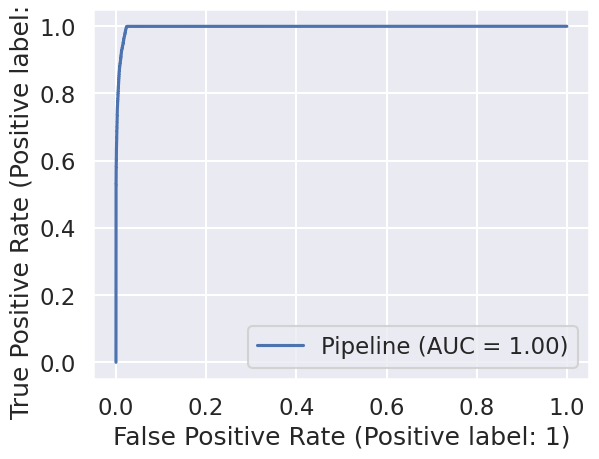

In [20]:
from sklearn.metrics import RocCurveDisplay
log_cor_est = RocCurveDisplay.from_estimator(pipe_LGBM,X_test, y_test,)
plt.show()

In [22]:
## Variables de mayor importancia según el modelo

features_trasformed=list(X.columns.values)
fi=list(pipe_LGBM["LGBM"].feature_importances_)

feature_importance_df=pd.DataFrame()
feature_importance_df["feature"]=features_trasformed
feature_importance_df["feature_importance"]=fi
feature_importance_df=feature_importance_df.sort_values(by="feature_importance",ascending=False)
feature_importance_df.head(20)


,feature,feature_importance
65,income,356
68,LTV,351
66,Credit_Score,315
70,dtir1,259
63,loan_amount,202
42,credit_type_EQUI,194
69,property_value,182
67,Upfront_charges,177
64,term,81
27,lump_sum_payment_lpsm,64


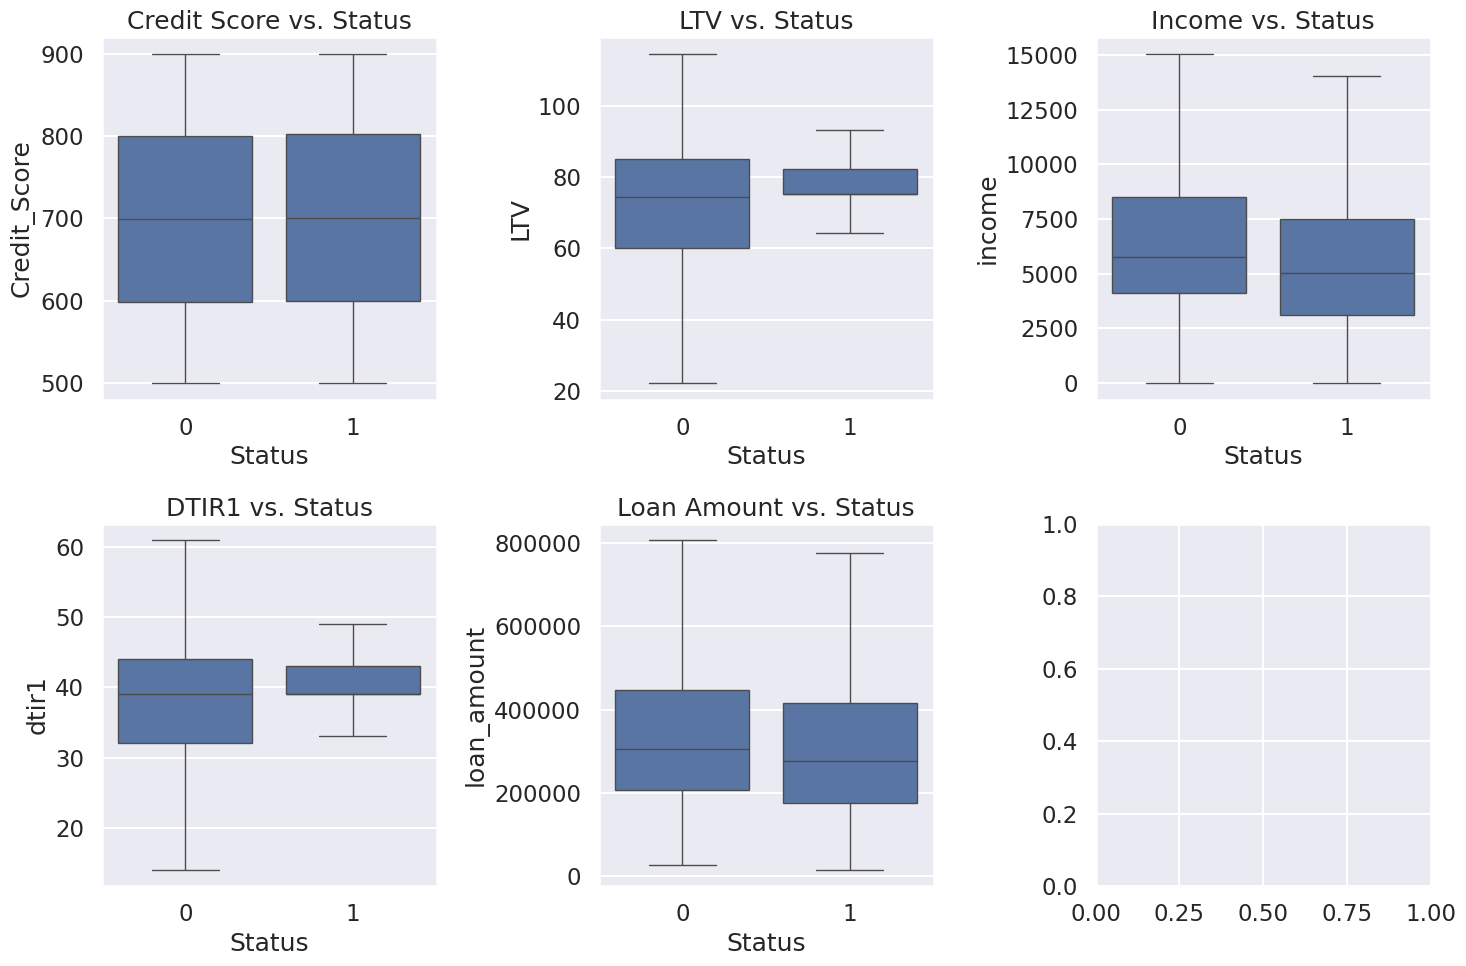

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con subplots 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Lista de las columnas a graficar
columnas = ["Credit_Score", "LTV", "income", "dtir1", "loan_amount"]

# Lista de etiquetas de las columnas
etiquetas = ["Credit Score", "LTV", "Income", "DTIR1", "Loan Amount"]

# Recorrido para crear los boxplots
for i, columna in enumerate(columnas):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, x="Status", y=columna, ax=axes[row, col], showfliers=False)
    axes[row, col].set_title(f"{etiquetas[i]} vs. Status")

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con los boxplots en una matriz 2x3
plt.show()

In [25]:
## Ahora realizamos un analisis de las variables clasificatorias
## importamos la base limpia sin realizar el dummy para hacer el analisis con variables clasificatoria
df1=pd.read_csv("/content/drive/MyDrive/GRUPO15-BASE5/ENTREGA FINAL GRUPO 15/Base 5 Incumplimiento de préstamo.csv")

cols_to_drop = ['Unnamed: 0', 'year']
df1 = df1.drop(columns=cols_to_drop)

categorical=[
    "Gender","approv_in_adv","loan_type","loan_purpose","loan_purpose"
    ,"Credit_Worthiness","open_credit","business_or_commercial","Neg_ammortization"
    ,"interest_only","lump_sum_payment","construction_type","occupancy_type","Secured_by"
    ,"total_units","credit_type","co-applicant_credit_type","age","submission_of_application"
    ,"Region","Security_Type","loan_limit"
]
numeric =[
    "loan_amount","term","income","Credit_Score","Upfront_charges","LTV","property_value"
    ,"dtir1","Status"
]
 # Impugnamos valores nulos en las variables categóricas, reemplazándolos
    # por la moda
for col in categorical:
    df1[col] = df1[col].fillna(df1[col].mode().values[0])
    # Impugnamos valores nulos en las variables numéricas, reemplazándolos
    # por la mediana
for col in numeric:
    df1[col] = df1[col].fillna(df1[col].median())


    # Verificamos que no existan valores nulos en el dataset final
assert df1.isna().any().any() == False

    # Verificamos que todas las columnas numéricas son variables numéricas
assert np.all(is_numeric_dtype(df[col]) for col in df1.columns)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   Upfront_charges            148670 non-null  float64
 10  term                       148670 non-null  float64
 11  Neg_ammortization          148670 non-null  object 
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

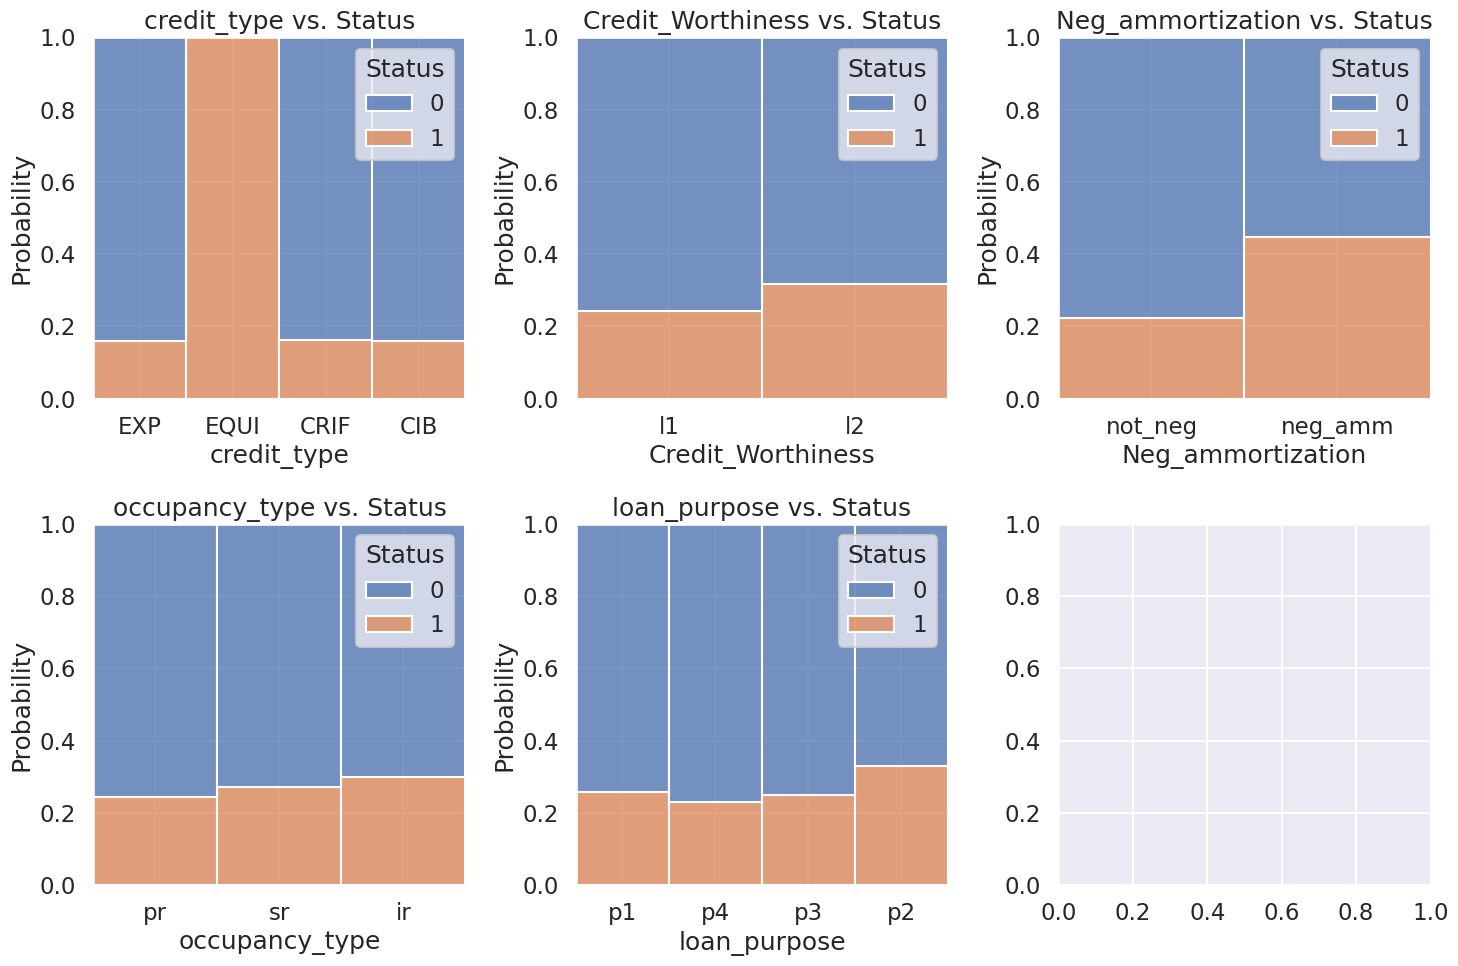

In [26]:


# Crear una figura con subplots 3x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Lista de columnas a graficar
columnas = ["credit_type", "Credit_Worthiness", "Neg_ammortization", "occupancy_type", "loan_purpose"]

# Recorrido para crear los gráficos en la misma fila
for i, columna in enumerate(columnas):
    row = i // 3
    col = i % 3
    sns.histplot(df1, x=columna, hue="Status", stat="probability", multiple="fill", ax=axes[row, col])
    axes[row, col].set_title(f'{columna} vs. Status')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con los gráficos en una matriz 3x3
plt.show()